# Stroke Prediction Naive Bayes Classifier

***Stroke is a medical condition that can lead to the death of a person. It’s a severe condition and if treated on time we can save one’s life and treat them well. There can be n number of factors that can lead to strokes and in this project blog, we will try to analyze a few of them. I have taken the dataset from Kaggle. It has 12 variables and 5110 observations.***

In [5]:
!pip install -U imbalanced-learn

# Importing Libraries

In [6]:
!pip install seaborn

In [11]:
!pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

In [2]:
pd.set_option('display.max_columns', None)

# Reading CSV

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**BMI has missing values**

In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Performing EDA

### ID

ID is nothing but a unique number assigned to every patient to keep track of them and making them unique. There is no need for ID it’s completely useless so let’s remove it.

In [6]:
data.drop('id', axis=1, inplace=True)

### Gender

This attribute states the gender of the patient. Let’s see how does Gender affects and Gender wise comparison of stroke rate.

In [7]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [8]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

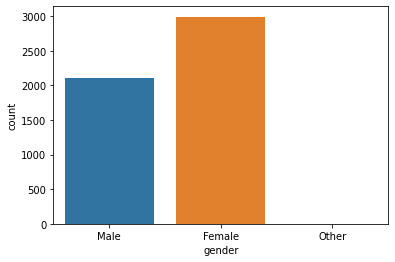

In [9]:
sns.countplot(x='gender', data=data)

<AxesSubplot:xlabel='gender', ylabel='count'>

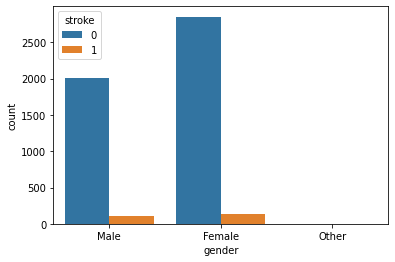

In [10]:
sns.countplot(x='gender', data=data, hue='stroke')

### Age

Well here age is just not a number, it’s one of the significant or as we can say it’s a very crucial factor. Let’s analyze our data and see how much impact actual impact it has.

In [11]:
data.age.nunique()

104

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

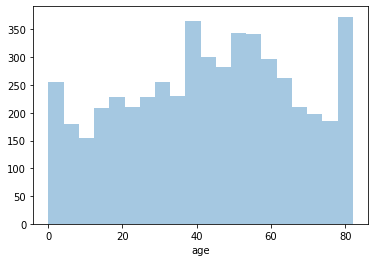

In [12]:
sns.distplot(data['age'], kde=False, bins=20)

<AxesSubplot:xlabel='stroke', ylabel='age'>

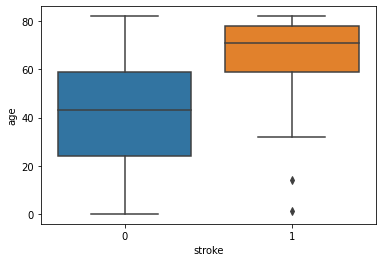

In [13]:
sns.boxplot(x='stroke', y='age', data=data)

### Hypertension

Hypertension is a condition when a person has high blood pressure. Hypertension might result in a stroke. Let’s see how it goes.

In [14]:
data.hypertension.unique()

array([0, 1], dtype=int64)

In [15]:
data.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

<AxesSubplot:xlabel='hypertension', ylabel='count'>

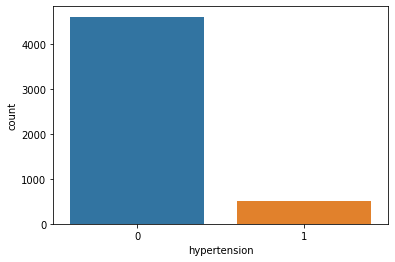

In [16]:
sns.countplot(x='hypertension', data=data)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

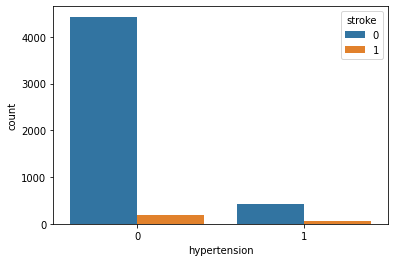

In [17]:
sns.countplot(x='hypertension', data=data, hue='stroke')

### Heart Disease

People having heart disease tends to have a higher risk of having a stroke if proper care is not taken.

In [18]:
data.heart_disease.unique()

array([1, 0], dtype=int64)

In [19]:
data.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

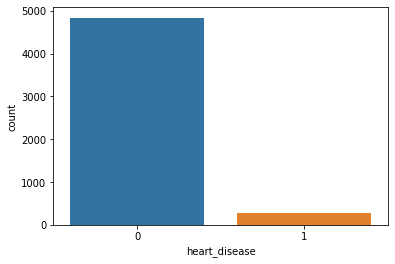

In [20]:
sns.countplot(x='heart_disease', data=data)

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

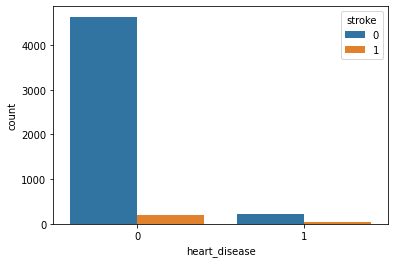

In [21]:
sns.countplot(x='heart_disease', data=data, hue='stroke')

### Ever married

This attribute will tell us whether or not the patient was ever married. Let’s see how will it affect the chances of having a stroke.

In [22]:
data.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [23]:
data.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:xlabel='ever_married', ylabel='count'>

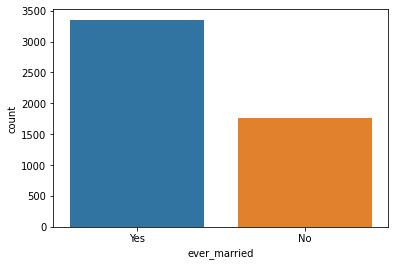

In [24]:
sns.countplot(x='ever_married', data=data)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

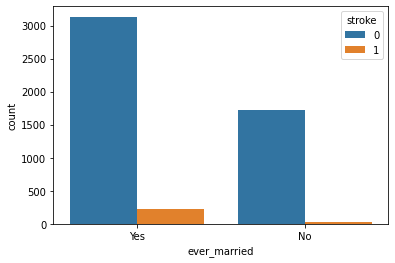

In [25]:
sns.countplot(x='ever_married', data=data, hue='stroke')

### Work Type

This attribute contains data about what kind of work does the patient. Different kinds of work have different kinds of problems and challenges which can be the possible reason for excitement, thrill, stress, etc. Stress is never good for health, let’s see how this variable can affect the chances of having a stroke.

In [26]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [27]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

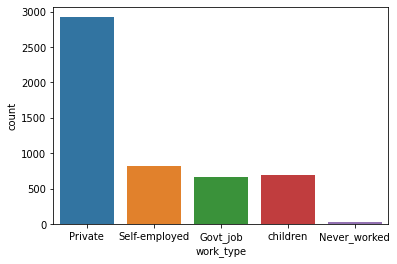

In [28]:
sns.countplot(x='work_type', data=data)

<AxesSubplot:xlabel='work_type', ylabel='count'>

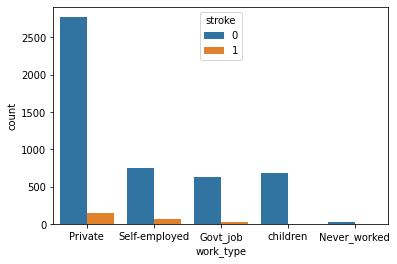

In [29]:
sns.countplot(x='work_type', data=data, hue='stroke')

### Residence Type

This attribute tells us whether what kind of residence the patient is. It can be Urban or Rural.

In [30]:
data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [31]:
data.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

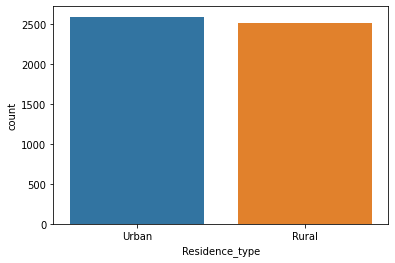

In [32]:
sns.countplot(x='Residence_type', data=data)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

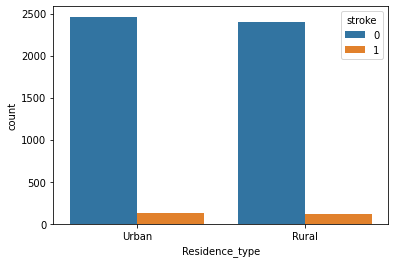

In [33]:
sns.countplot(x='Residence_type', data=data, hue='stroke')

### Average Glucose level

Tells about the average glucose level in the patient’s body. Let’s see whether this affects the chances of having a stroke

In [34]:
data.avg_glucose_level.nunique()

3979

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level'>

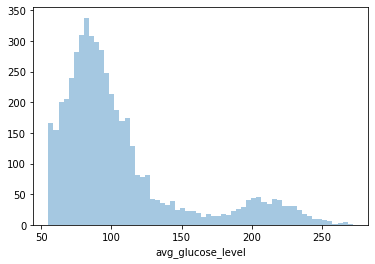

In [35]:
sns.distplot(data['avg_glucose_level'], kde=False, bins=60)

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

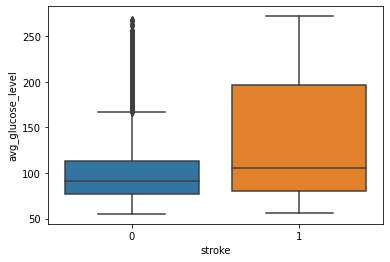

In [36]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)

### BMI (Missing Value)

Body Mass Index is a measure of body fat based on height and weight that applies to adult men and women. Let’s see how does it affect the chances of having a stroke.

In [37]:
data['bmi'].isna().sum()

201

In [38]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [39]:
data['bmi'].nunique()

419

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi'>

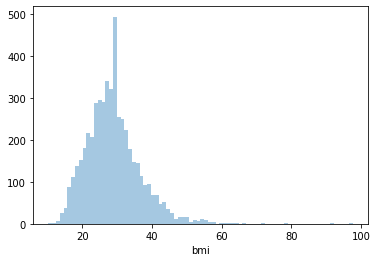

In [40]:
sns.distplot(data['bmi'], kde=False, bins=80)

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

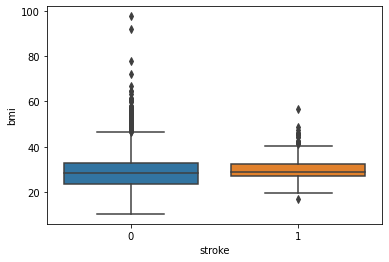

In [41]:
sns.boxplot(x='stroke', y='bmi', data=data)

### Smoking Status

These attributes tell us whether or not the patient smokes. Smoking is injurious to health and may cause cardiac disease. Let’s see how it turns out in the case of our data.

In [42]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [43]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

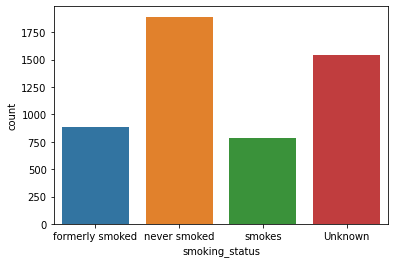

In [44]:
sns.countplot(x='smoking_status', data=data)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

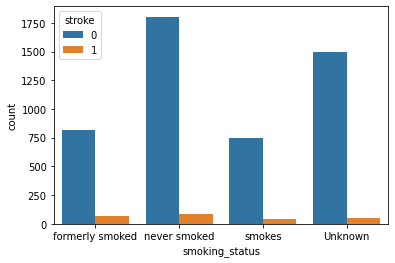

In [45]:
sns.countplot(x='smoking_status', data=data, hue='stroke')

### Checking Target Variable: Stroke

In [46]:
data.stroke.unique()

array([1, 0], dtype=int64)

In [47]:
data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

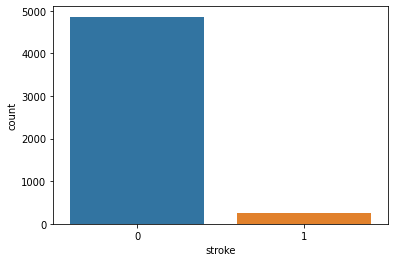

In [48]:
sns.countplot(data=data, x='stroke')

# Feature Engineering

In [49]:
cols = data.select_dtypes(include=['object']).columns
print(cols)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


### Label Encoding

In [50]:
le = LabelEncoder()

In [51]:
data[cols] = data[cols].apply(le.fit_transform)

In [52]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


### Correlation

In [80]:
print(gb.predict([[67,1,1,228.69,0]]))

[0]


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<AxesSubplot:>

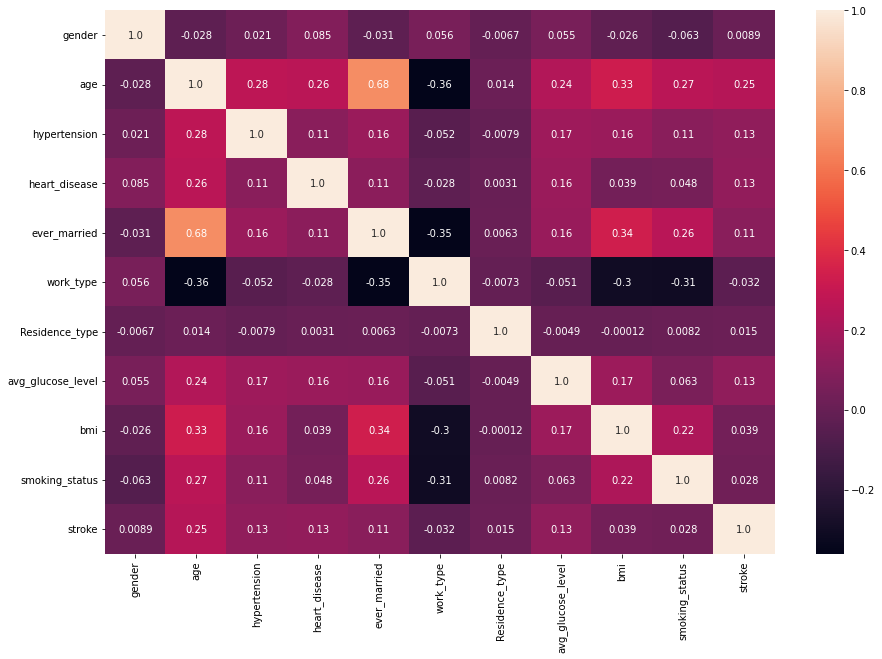

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

Variables that are showing some effective correlation are:

age, hypertension, heart_disease, ever_married, avg_glucose_level.

Just to be on the safe side let’s check our features using SelectKBest and F_Classif.

In [54]:
classifier = SelectKBest(score_func=f_classif, k=5)

In [55]:
fits = classifier.fit(data.drop('stroke', axis=1), data['stroke'])

In [56]:
x=pd.DataFrame(fits.scores_)

In [57]:
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)

In [58]:
fscores = pd.concat([columns, x], axis=1)
fscores.columns = ['Attribute', 'Score']

In [59]:
fscores.sort_values(by='Score', ascending=False)

,Attribute,Score
1,age,326.916568
3,heart_disease,94.698406
7,avg_glucose_level,90.503870
2,hypertension,84.953542
4,ever_married,60.667230
8,bmi,7.759776
5,work_type,5.340019
9,smoking_status,4.043033
6,Residence_type,1.220842
0,gender,0.407266


In the above result, we can see that age is a highly correlated variable and then it gets decreasing. I am keeping the threshold score as 50. Resulting in the same features we got in the heatmap.

In [60]:
cols = fscores[fscores['Score']>50]['Attribute']

In [61]:
cols

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object

# Splitting data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data[cols], data['stroke'], test_size=0.25, random_state=1255)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3832, 5), (1278, 5), (3832,), (1278,))

# Balancing Dataset

**As we know, our dataset is imbalanced. So let’s balance our data. We are going to use SMOTE method for this. It will populate our data with records similar to our minor class. Usually, we perform this on the whole dataset but as we have very fewer records of minor class I am applying it on both train and test data. Earlier I tried doing it by just resampling data of the training dataset but it didn’t perform that well so I tried this approach and got a good result.**

In [64]:
smote=SMOTE()

In [65]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [66]:
X_test, y_test = smote.fit_resample(X_test, y_test)

In [67]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7296, 5), (2426, 5), (7296,), (2426,))

# Model Creation

In [68]:
gb = GaussianNB()

In [69]:
gb.fit(X_train, y_train)

GaussianNB()

In [70]:
predict = gb.predict(X_test)

In the balanced dataset, we rely on accuracy but here we have an imbalanced dataset, I am going with the f1 score. For a good classifier, it would be great to have good precision and recall score.

In [71]:
print('Accuracy --> ',accuracy_score(predict,y_test))
print('F1 Score --> ',f1_score(predict,y_test))
print('Classification Report  --> \n',classification_report(predict,y_test))

Accuracy -->  0.692085737840066
F1 Score -->  0.6942284076954565
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      1196
           1       0.70      0.69      0.69      1230

    accuracy                           0.69      2426
   macro avg       0.69      0.69      0.69      2426
weighted avg       0.69      0.69      0.69      2426



In [72]:
import pickle

In [83]:
predict

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [85]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0
5109,0,44.0,0,0,1,0,1,85.28,26.200000,0,0


In [86]:
print(gb.predict([[44,0,0,85.28,0]]))

[0]


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [77]:
with open('model_pickle.pkl', 'wb') as f:
    pickle.dump(gb,f)

# The END!